In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [126]:
df = pd.read_csv("/workspaces/DJS-compute-tasks/Task 1/Data/listings_data.csv")

In [127]:
# For convenient viewing of the data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [128]:
df.head(7)

,listing_id,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0


In [129]:
df.drop('listing_name', axis=1).head(10)

,listing_id,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
5,5099,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
6,5121,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0
7,5178,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220
8,5203,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0
9,5238,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188


* **Here listing name isnt giving us any necessary information that cant be achieved from the host id, it is safe to drop it**

In [130]:
df.shape

(48895, 16)

In [131]:
host_names = df['host_name'].unique()

In [132]:
print(host_names)

['John' 'Jennifer' 'Elisabeth' ... 'Abayomi' 'Alberth' 'Ilgar & Aysel']


In [133]:
for name in host_names:
    print(name)

John
Jennifer
Elisabeth
LisaRoxanne
Laura
Chris
Garon
Shunichi
MaryEllen
Ben
Lena
Kate
Laurie
Claudio
Alina
Allen & Irina
Jane
Doti
Adam And Charity
Sing
Chaya
Lisel
Nathalie
Gregory
Claude & Sophie
Tommi
Shon
Dana
Ssameer Or Trip
Teri
Andrea
Angela
Vt
Tyrome
Harriet
Edward
Abdul
Yolande
Cyn
Earl
Rana
Orestes
Adreinne
Alexander
JT And Tiziana
Joya
James
Jeanne
Francesca
Joanna
Bianca
Luiz
Ted
Cristina
Petra
D
Dimitri
Patricia
Mark
Sara
Reka
Daniel
Casey
Robin
Anna
Enzo
Tye And Etienne
George
Josh
Victoria
Justin
Blaise
DAVID And RICK
Lulú
Sybilla
JoLynn
Gaia
Ana
Maggie
Starlee
Pas
Augustin
Sean & Lynette
Erica
Tracy
Christiana
Elliott
Olan
Shelly
Annette
Meka
Ann
Seth
Brenda
Erik
Dena
Jessica
Sally
Dani
Bruce
Nimo
Alexandra
Stacy
Evelyn
Emma
Vero
Sylvie
Jen
Kay
Jo
Lisa
Fernando And Lenin
Laurine
Uli
Sol
Cs
Lara
Tom
Sunder
Waldemar
Khem
Sahr
Ali+Scott
Sarah
Fredah
Katherine
Ming
Paula
Obed
Karen
Michael
White
Paz
Irene
Karene
Viviana
Marie
Gus
Myung
Renée
Henry
Sylvia
Syl
Lorenzo
Newyor

In [134]:
df['host_name'].duplicated().unique()

array([False,  True])

In [135]:
df['listing_id'].duplicated().unique()

array([False])

* **Here it is seen that there are some people with the same names so it is not correct to drop all the host ids, but the listing ids can be dropped.**

In [136]:
df.drop('listing_id', inplace=True, axis=1)

In [137]:
df.head(5)

,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [138]:
df.dtypes

listing_name             object
host_id                   int64
host_name                object
borough                  object
area                     object
latitude                float64
longitude               float64
room_type                object
price (in dollars)        int64
minimum_stay              int64
no_of_reviews             int64
last_review_date         object
reviews_per_month       float64
host_listing_count        int64
booking_availability      int64
dtype: object

* **There are certain features which can be improved if they are str**

In [139]:
columns = ['host_name','borough','area','room_type']
# for col in columns:
df[columns] = df[columns].astype(str)

* **Here longitude and latitude individually do not have much important but together they are useful so it is better to create a single column for them instead of having them as 2 features.**

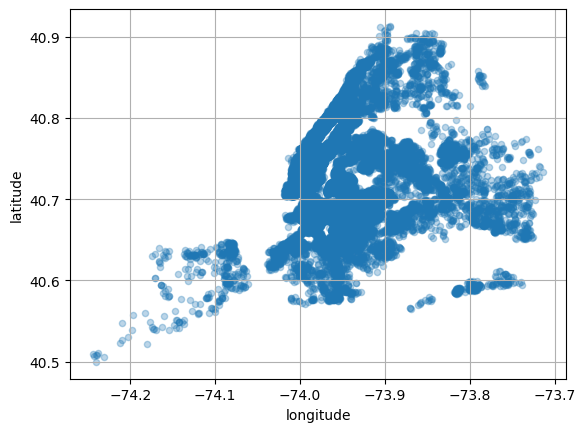

In [140]:
df.plot(kind = 'scatter' , x = 'longitude', y = 'latitude', grid = True, alpha =0.3)
plt.show();

In [141]:
df.isnull().sum()

listing_name               16
host_id                     0
host_name                   0
borough                     0
area                        0
latitude                    0
longitude                   0
room_type                   0
price (in dollars)          0
minimum_stay                0
no_of_reviews               0
last_review_date        10052
reviews_per_month       10052
host_listing_count          0
booking_availability        0
dtype: int64

In [142]:
columns_checking = ['last_review_date','reviews_per_month','listing_name']

def null_pecentage(df, columns):
    result={}
    for col in columns:
        if col in df.columns:
            null_percentage = (df[col].isnull().sum() / len(df)) * 100
            result[col] = round(null_percentage, 2)
        else:
            result[col] = "Column not found"
    return result

null_percentage = null_pecentage(df, columns_checking)

for column, percentage in null_percentage.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}")
    

last_review_date: 20.56%
reviews_per_month: 20.56%
listing_name: 0.03%


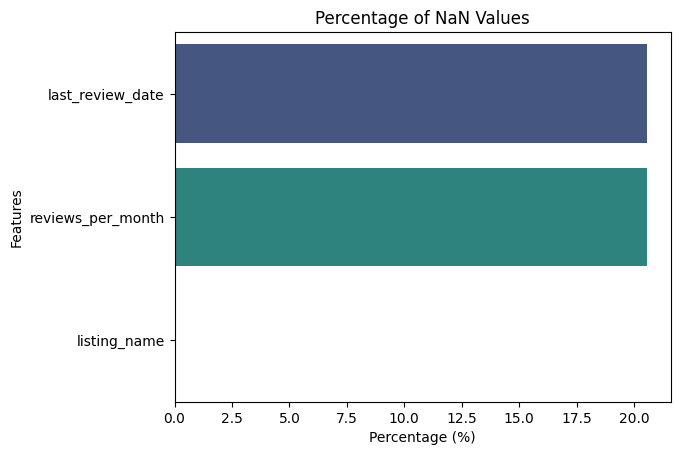

In [143]:
sns.barplot(data=null_percentage, x=null_percentage.values(), y=null_percentage.keys(), palette='viridis', hue=null_percentage.keys()).set(title="Percentage of NaN Values", xlabel="Percentage (%)", ylabel="Features")
plt.show()

* **The number of null values in listing name is very less so those rows of null values can be dropped in a big dataset**

In [144]:
df['listing_name'].dropna(inplace=True)

* **Filling the null values in reviews per month with the mean to have a more balanced data**

In [145]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].mean())

In [146]:
df['reviews_per_month'].isnull().sum()

np.int64(0)

In [147]:
df.head(5)

,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.210000,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.380000,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.373221,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.640000,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.100000,1,0


In [148]:
df[['LRDate','LRMonth', 'LRYear']]=df['last_review_date'].str.split('-', expand =True)
df.drop('last_review_date', axis=1,inplace=True)
df.head()

,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,reviews_per_month,host_listing_count,booking_availability,LRDate,LRMonth,LRYear
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365,19,10,2018
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355,21,05,2019
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365,NaN,NaN,NaN
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194,05,07,2019
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0,19,11,2018


In [149]:
df[['LRDate','LRMonth', 'LRYear']]=df[['LRDate','LRMonth', 'LRYear']].fillna(df[['LRDate','LRMonth', 'LRYear']].mode())

In [150]:
fig, ax = plt.subplots(figsize=(90, 7))

sns.barplot(x='area', y='price (in dollars)', data=df, color='orange')
plt.title('Area vs Price($)')
plt.xlabel('Area')
plt.ylabel('Price($)')
plt.xticks(rotation=45, ha='right')
plt.show()

* **There are a lot of area but from this huge graph the inference possible is that the area of Tribecca, Woodrow, Battery park city, Seagate, Riverdale, Prince's bay and Fort Wadsworth have relatively higher prices.**

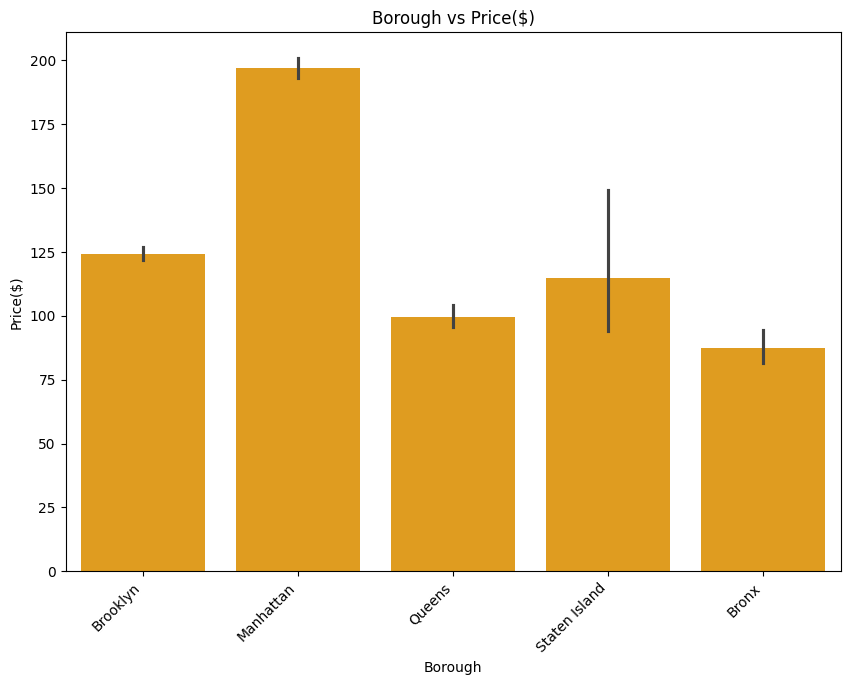

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.barplot(x='borough', y='price (in dollars)', data=df, color='orange')
plt.title('Borough vs Price($)')
plt.xlabel('Borough')
plt.ylabel('Price($)')
plt.xticks(rotation=45, ha='right')
plt.show()

* **From the above graph the order for prices of property per borough in descending order is:** 
    1. Manhattan
    2. Brooklyn
    3. Staten Island
    4. Queens
    5. Bronx

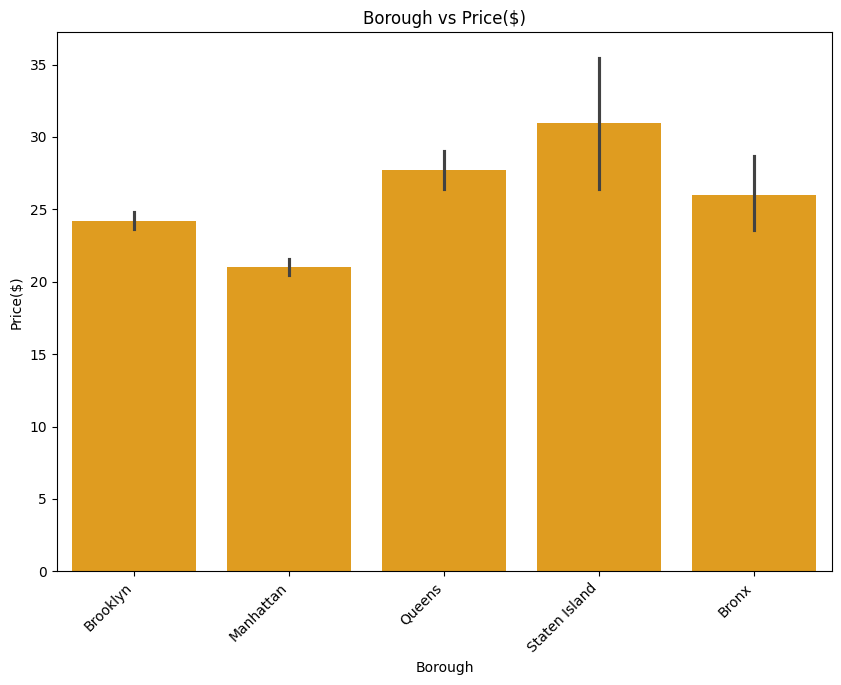

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.barplot(x='borough', y='no_of_reviews', data=df, color='orange')
plt.title('Borough vs Price($)')
plt.xlabel('Borough')
plt.ylabel('Price($)')
plt.xticks(rotation=45, ha='right')
plt.show()

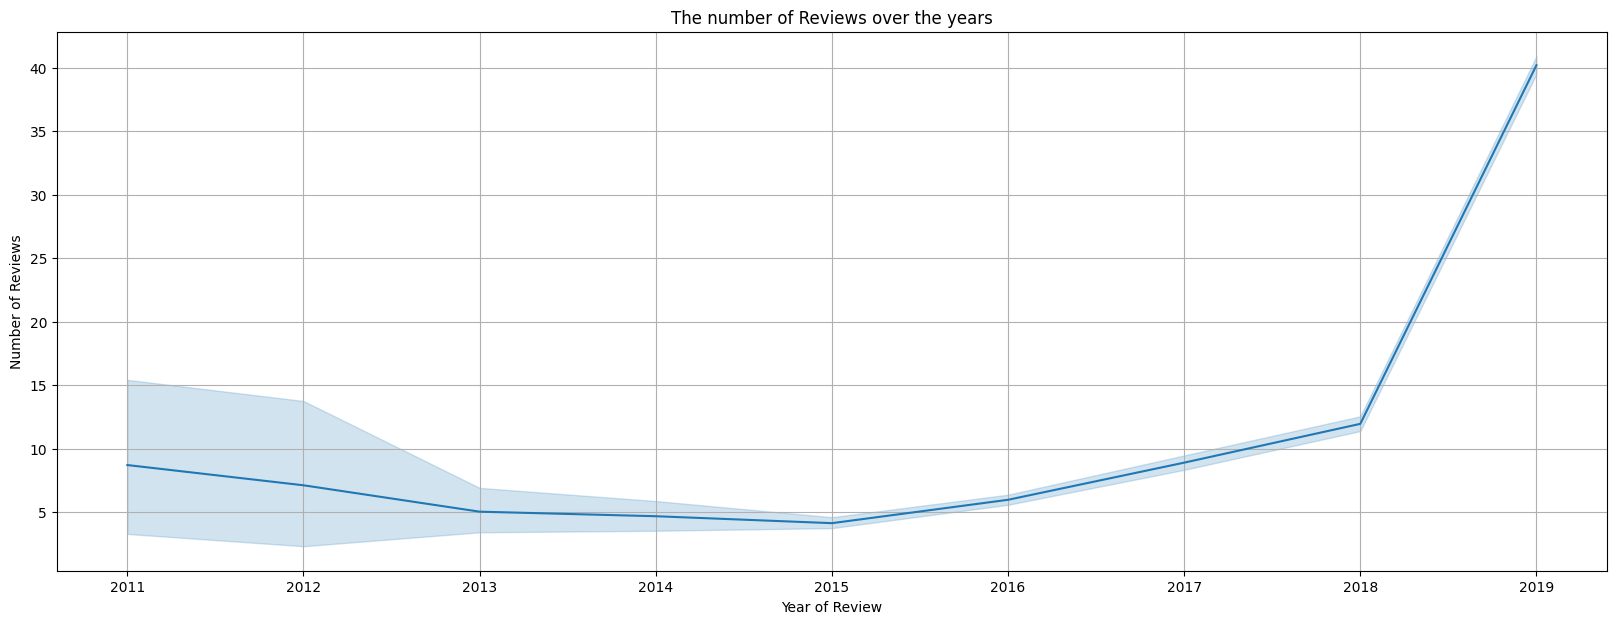

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))
df_plot = df.sort_values(by='LRYear')
sns.lineplot(x='LRYear', y='no_of_reviews', data=df_plot)
plt.title('The number of Reviews over the years')
plt.xlabel('Year of Review')
plt.ylabel('Number of Reviews')
plt.grid(True)

* **From here it is visible that the mean of the number of reviews, and this the popularity of this platform has increased in the recent years.**